# Data Visualisation of how input and output prompts progress over summary iterations
We base this on a select few summaries of needles in QA3, 128k, from the main experiment. The amount of summaries here are (likely) because there is an entity overlap between the needle and an actual entity. This is no ground truth, but still it serves as a sort of reference point.

In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import LogLocator

from pathlib import Path
import pandas as pd
import sys

sys.path.append("..")
import visualization


%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
# Load data from files
path = Path("202506052215/")
path2 = Path("202506081025/")
path3 = Path("202506081359/")
df1 = pd.read_csv(path / Path("prompts-qa3.csv"))
df2 = pd.read_csv(path2 / Path("prompts-qa3.csv"))
df3 = pd.read_csv(path3 / Path("prompts-qa3.csv"))
df = pd.concat([df1, df2, df3])
df = df[df["token_size"] >= 128]
df

,token_size,index,prompt,response,llm_time,input_tokens,output_tokens,entity
1814,128,1,The garden is associated with a context involv...,The garden is associated with a context involv...,1.298826,252,58,garden
1815,128,1,The garden is associated with a context involv...,The garden is associated with a context involv...,1.786830,251,93,garden
1816,128,1,The garden is associated with a context involv...,The garden is associated with a context involv...,2.680642,303,128,garden
1817,128,1,The garden is associated with a context involv...,The garden is associated with a context involv...,3.203949,376,180,garden
1818,128,1,The garden is associated with a context involv...,The garden is associated with a context involv...,3.457583,410,244,garden
...,...,...,...,...,...,...,...,...
2155,128,50,<summary>\n\n</summary>\n<chunk>\nAt this time...,The new information does not provide any detai...,0.791277,254,32,apple
2156,128,50,<summary>\nThe new information does not provid...,"The apple was obtained by Sandra, who is descr...",1.180760,290,58,apple
2157,128,50,"<summary>\nThe apple was obtained by Sandra, w...","The apple was obtained by Sandra, who is descr...",1.963372,302,80,apple
2158,128,50,"<summary>\nThe apple was obtained by Sandra, w...",The apple is traditionally associated with the...,1.291451,315,74,apple


In [4]:
df["cum_input_tokens"] = df.groupby(["index", "entity"])["input_tokens"].cumsum()
df["cum_output_tokens"] = df.groupby(["index", "entity"])["output_tokens"].cumsum()
df

,token_size,index,prompt,response,llm_time,input_tokens,output_tokens,entity,cum_input_tokens,cum_output_tokens
1814,128,1,The garden is associated with a context involv...,The garden is associated with a context involv...,1.298826,252,58,garden,252.0,58.0
1815,128,1,The garden is associated with a context involv...,The garden is associated with a context involv...,1.786830,251,93,garden,503.0,151.0
1816,128,1,The garden is associated with a context involv...,The garden is associated with a context involv...,2.680642,303,128,garden,806.0,279.0
1817,128,1,The garden is associated with a context involv...,The garden is associated with a context involv...,3.203949,376,180,garden,1182.0,459.0
1818,128,1,The garden is associated with a context involv...,The garden is associated with a context involv...,3.457583,410,244,garden,1592.0,703.0
...,...,...,...,...,...,...,...,...,...,...
2155,128,50,<summary>\n\n</summary>\n<chunk>\nAt this time...,The new information does not provide any detai...,0.791277,254,32,apple,254.0,32.0
2156,128,50,<summary>\nThe new information does not provid...,"The apple was obtained by Sandra, who is descr...",1.180760,290,58,apple,544.0,90.0
2157,128,50,"<summary>\nThe apple was obtained by Sandra, w...","The apple was obtained by Sandra, who is descr...",1.963372,302,80,apple,846.0,170.0
2158,128,50,"<summary>\nThe apple was obtained by Sandra, w...",The apple is traditionally associated with the...,1.291451,315,74,apple,1161.0,244.0


We want to get an idea of how many summaries each entity has

In [5]:
summary_count = df.groupby(["entity", "index"])['response'].size().reset_index()
summary_count

,entity,index,response
0,apple,3,6
1,apple,7,3
2,apple,11,2
3,apple,13,21
4,apple,15,11
...,...,...,...
84,milk,48,8
85,office,8,6
86,office,17,14
87,office,34,4


In [6]:
filtered_summary_count = summary_count[summary_count['response'] >= 10].reset_index()
filtered_summary_count

,level_0,entity,index,response
0,3,apple,13,21
1,4,apple,15,11
2,5,apple,17,11
3,11,apple,31,16
4,15,apple,46,16
5,17,bathroom,4,11
6,21,bathroom,48,10
7,25,bedroom,13,12
8,26,bedroom,16,20
9,28,bedroom,27,10


In [7]:
df_with_counts = df.merge(summary_count, on=['entity', 'index'])
df_with_counts = df_with_counts[df_with_counts['entity'].notna()]
df_with_counts

,token_size,index,prompt,response_x,llm_time,input_tokens,output_tokens,entity,cum_input_tokens,cum_output_tokens,response_y
0,128,1,The garden is associated with a context involv...,The garden is associated with a context involv...,1.298826,252,58,garden,252.0,58.0,10
1,128,1,The garden is associated with a context involv...,The garden is associated with a context involv...,1.786830,251,93,garden,503.0,151.0,10
2,128,1,The garden is associated with a context involv...,The garden is associated with a context involv...,2.680642,303,128,garden,806.0,279.0,10
3,128,1,The garden is associated with a context involv...,The garden is associated with a context involv...,3.203949,376,180,garden,1182.0,459.0,10
4,128,1,The garden is associated with a context involv...,The garden is associated with a context involv...,3.457583,410,244,garden,1592.0,703.0,10
...,...,...,...,...,...,...,...,...,...,...,...
628,128,49,"<summary>\nThe football, once a symbol of pers...","The football, once a symbol of personal or com...",1.938128,353,118,football,4255.0,1123.0,13
629,128,50,<summary>\n\n</summary>\n<chunk>\nAt this time...,The new information does not provide any detai...,0.791277,254,32,apple,254.0,32.0,4
630,128,50,<summary>\nThe new information does not provid...,"The apple was obtained by Sandra, who is descr...",1.180760,290,58,apple,544.0,90.0,4
631,128,50,"<summary>\nThe apple was obtained by Sandra, w...","The apple was obtained by Sandra, who is descr...",1.963372,302,80,apple,846.0,170.0,4


In [8]:
df_with_counts["summary_counter"] = (df_with_counts.groupby(['entity', 'index']).cumcount() + 1)
df_with_counts

,token_size,index,prompt,response_x,llm_time,input_tokens,output_tokens,entity,cum_input_tokens,cum_output_tokens,response_y,summary_counter
0,128,1,The garden is associated with a context involv...,The garden is associated with a context involv...,1.298826,252,58,garden,252.0,58.0,10,1
1,128,1,The garden is associated with a context involv...,The garden is associated with a context involv...,1.786830,251,93,garden,503.0,151.0,10,2
2,128,1,The garden is associated with a context involv...,The garden is associated with a context involv...,2.680642,303,128,garden,806.0,279.0,10,3
3,128,1,The garden is associated with a context involv...,The garden is associated with a context involv...,3.203949,376,180,garden,1182.0,459.0,10,4
4,128,1,The garden is associated with a context involv...,The garden is associated with a context involv...,3.457583,410,244,garden,1592.0,703.0,10,5
...,...,...,...,...,...,...,...,...,...,...,...,...
628,128,49,"<summary>\nThe football, once a symbol of pers...","The football, once a symbol of personal or com...",1.938128,353,118,football,4255.0,1123.0,13,13
629,128,50,<summary>\n\n</summary>\n<chunk>\nAt this time...,The new information does not provide any detai...,0.791277,254,32,apple,254.0,32.0,4,1
630,128,50,<summary>\nThe new information does not provid...,"The apple was obtained by Sandra, who is descr...",1.180760,290,58,apple,544.0,90.0,4,2
631,128,50,"<summary>\nThe apple was obtained by Sandra, w...","The apple was obtained by Sandra, who is descr...",1.963372,302,80,apple,846.0,170.0,4,3


In [9]:
# Dump to .csv to see
small_df_with_counts = df_with_counts[['index', 'entity', 'summary_counter', 'cum_input_tokens', 'cum_output_tokens']]

small_df_with_counts.to_csv('summary_count_df.csv')

In [10]:
## There's still an issue with not filtering entities with few summaries
summary_sizes = small_df_with_counts.groupby(['entity', 'index'])['summary_counter'].max().reset_index()
summary_sizes

,entity,index,summary_counter
0,apple,3,6
1,apple,7,3
2,apple,11,2
3,apple,13,21
4,apple,15,11
...,...,...,...
84,milk,48,8
85,office,8,6
86,office,17,14
87,office,34,4


In [11]:
# We define valid summaries as those with at least 10 summaries
valid_summaries_pairs = summary_sizes[summary_sizes['summary_counter'] >= 10]
valid_summaries_pairs

,entity,index,summary_counter
3,apple,13,21
4,apple,15,11
5,apple,17,11
11,apple,31,16
15,apple,46,16
17,bathroom,4,11
21,bathroom,48,10
25,bedroom,13,12
26,bedroom,16,20
28,bedroom,27,10


In [12]:
# Join
valid_summaries_df = pd.merge(valid_summaries_pairs, df)
valid_summaries_df

,entity,index,summary_counter,token_size,prompt,response,llm_time,input_tokens,output_tokens,cum_input_tokens,cum_output_tokens
0,apple,13,21,128,"The apple has a shiny belt on its epidermis, w...","The apple has a shiny belt on its epidermis, w...",1.299272,244,50,244.0,50.0
1,apple,13,21,128,"The apple has a shiny belt on its epidermis, w...","The apple has a shiny belt on its epidermis, w...",1.843458,309,95,553.0,145.0
2,apple,13,21,128,"The apple has a shiny belt on its epidermis, w...","The apple has a shiny belt on its epidermis, w...",2.092772,337,130,890.0,275.0
3,apple,13,21,128,"The apple has a shiny belt on its epidermis, w...","The apple has a shiny belt on its epidermis, w...",2.597933,348,157,1238.0,432.0
4,apple,13,21,128,"The apple has a shiny belt on its epidermis, w...","The apple has a shiny belt on its epidermis, w...",2.713797,385,193,1623.0,625.0
...,...,...,...,...,...,...,...,...,...,...,...
335,office,17,14,128,"The office is a location where Sandra went, an...","The office is a location where Sandra went, an...",4.770849,447,226,3228.0,1053.0
336,office,17,14,128,"The office is a location where Sandra went, as...","The office is a location where Sandra went, as...",5.603188,441,263,3669.0,1316.0
337,office,17,14,128,"The office is a location where Sandra went, as...","The office is a location where Sandra went, as...",4.721620,507,210,4176.0,1526.0
338,office,17,14,128,The office is a location associated with inves...,The office is a location associated with inves...,3.354334,460,239,4636.0,1765.0


In [13]:
valid_summaries_df.to_csv('summary_count_df.csv')

We now want to average by summary index for 1,\dots ,10

We try again

In [14]:
# Load data from files
path = Path("202506052215/")
df = pd.read_csv(path / Path("prompts-qa3.csv"))
df = df[df["token_size"] >= 128] # limit to 128k
df

,token_size,index,prompt,response,llm_time,input_tokens,output_tokens,entity
1814,128,1,The garden is associated with a context involv...,The garden is associated with a context involv...,1.298826,252,58,garden
1815,128,1,The garden is associated with a context involv...,The garden is associated with a context involv...,1.786830,251,93,garden
1816,128,1,The garden is associated with a context involv...,The garden is associated with a context involv...,2.680642,303,128,garden
1817,128,1,The garden is associated with a context involv...,The garden is associated with a context involv...,3.203949,376,180,garden
1818,128,1,The garden is associated with a context involv...,The garden is associated with a context involv...,3.457583,410,244,garden
...,...,...,...,...,...,...,...,...
2117,128,19,"<summary>\nThe apple was left by Daniel, who i...",Daniel,0.562856,206,1,NaN
2118,128,20,The hallway is a location where Sandra travels...,The hallway is a location where Sandra travels...,0.733800,240,25,hallway
2119,128,20,Sandra moved to the office. _Lic._ ...,Sandra moved to the office. _Lic._ ...,2.559944,336,211,football
2120,128,20,Sandra moved to the office. _Lic._ ...,Sandra moved to the office. _Lic._ ...,3.725991,464,237,football


In [15]:
df["cum_input_tokens"] = df.groupby(["index", "entity"])["input_tokens"].cumsum()
df["cum_output_tokens"] = df.groupby(["index", "entity"])["output_tokens"].cumsum()
df["summary_counter"] = (df.groupby(['entity', 'index']).cumcount() + 1)
df = df[['index', 'entity', 'cum_input_tokens', 'cum_output_tokens', 'summary_counter']]
df = df[df['entity'].notna()] # filter answers, we just want summaries
df

,index,entity,cum_input_tokens,cum_output_tokens,summary_counter
1814,1,garden,252.0,58.0,1.0
1815,1,garden,503.0,151.0,2.0
1816,1,garden,806.0,279.0,3.0
1817,1,garden,1182.0,459.0,4.0
1818,1,garden,1592.0,703.0,5.0
...,...,...,...,...,...
2115,19,hallway,540.0,106.0,2.0
2116,19,hallway,833.0,171.0,3.0
2118,20,hallway,240.0,25.0,1.0
2119,20,football,336.0,211.0,1.0


In [16]:
# Create pairs of (entity, index) to remove those entities, which have too few summaries (<10)
valid_summaries_pairs = df.groupby(['entity', 'index'])['summary_counter'].max().reset_index()

In [17]:
# And then join/merge df's
valid_summaries_df = pd.merge(df, valid_summaries_pairs, on=['index', 'entity'])
valid_summaries_df

,index,entity,cum_input_tokens,cum_output_tokens,summary_counter_x,summary_counter_y
0,1,garden,252.0,58.0,1.0,10.0
1,1,garden,503.0,151.0,2.0,10.0
2,1,garden,806.0,279.0,3.0,10.0
3,1,garden,1182.0,459.0,4.0,10.0
4,1,garden,1592.0,703.0,5.0,10.0
...,...,...,...,...,...,...
283,19,hallway,540.0,106.0,2.0,3.0
284,19,hallway,833.0,171.0,3.0,3.0
285,20,hallway,240.0,25.0,1.0,1.0
286,20,football,336.0,211.0,1.0,2.0


In [18]:
valid_summaries_df = valid_summaries_df[valid_summaries_df['summary_counter_y'] >= 19]
valid_summaries_df

,index,entity,cum_input_tokens,cum_output_tokens,summary_counter_x,summary_counter_y
57,6,football,242.0,25.0,1.0,19.0
58,6,football,496.0,51.0,2.0,19.0
59,6,football,749.0,87.0,3.0,19.0
60,6,football,1032.0,128.0,4.0,19.0
61,6,football,1319.0,169.0,5.0,19.0
...,...,...,...,...,...,...
274,18,kitchen,12987.0,6497.0,28.0,32.0
275,18,kitchen,13583.0,6777.0,29.0,32.0
276,18,kitchen,14108.0,7088.0,30.0,32.0
277,18,kitchen,14679.0,7447.0,31.0,32.0


In [19]:
# Now we want to filter to only have summary_counter_x (which is the actual summary index) to be at most 10.
valid_summaries_df = valid_summaries_df[valid_summaries_df['summary_counter_x'] <= 19]
valid_summaries_df = valid_summaries_df.rename(columns={
    'cum_input_tokens': 'Input Tokens',
    'cum_output_tokens': 'Output Tokens'
})
valid_summaries_df

,index,entity,Input Tokens,Output Tokens,summary_counter_x,summary_counter_y
57,6,football,242.0,25.0,1.0,19.0
58,6,football,496.0,51.0,2.0,19.0
59,6,football,749.0,87.0,3.0,19.0
60,6,football,1032.0,128.0,4.0,19.0
61,6,football,1319.0,169.0,5.0,19.0
...,...,...,...,...,...,...
261,18,kitchen,6568.0,3195.0,15.0,32.0
262,18,kitchen,7131.0,3551.0,16.0,32.0
263,18,kitchen,7735.0,3793.0,17.0,32.0
264,18,kitchen,8237.0,4106.0,18.0,32.0


In [20]:
melted = valid_summaries_df.melt(
    id_vars='summary_counter_x',
    value_vars=['Input Tokens', 'Output Tokens'],
    var_name='Token Type',
    value_name='Cumulative Tokens'
)
melted

,summary_counter_x,Token Type,Cumulative Tokens
0,1.0,Input Tokens,242.0
1,2.0,Input Tokens,496.0
2,3.0,Input Tokens,749.0
3,4.0,Input Tokens,1032.0
4,5.0,Input Tokens,1319.0
...,...,...,...
185,15.0,Output Tokens,3195.0
186,16.0,Output Tokens,3551.0
187,17.0,Output Tokens,3793.0
188,18.0,Output Tokens,4106.0


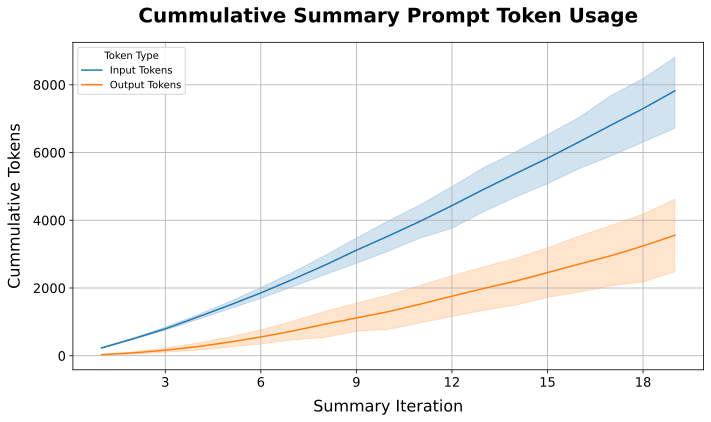

In [21]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(
    data=melted, 
    x='summary_counter_x', 
    y='Cumulative Tokens', 
    hue='Token Type', 
    estimator='mean', errorbar=('ci', 95))

ax.xaxis.set_major_locator(ticker.MultipleLocator(3))

plt.title('Cummulative Summary Prompt Token Usage', fontsize = 20, pad = 20, weight = 600)
plt.xlabel('Summary Iteration', fontsize = 16, labelpad=10)
plt.ylabel('Cummulative Tokens', fontsize = 16, labelpad = 10)
plt.tick_params(axis='both', labelsize = 13)
plt.grid(True)
plt.tight_layout()
plt.show()

# Data Visualisation of final summary size

In [33]:
# Load data from files
paths = [Path("202506052215/"), Path("202506081025"), Path("202506081359")]

row_sum = 0
df = None
for path in paths:
    df1 = pd.read_csv(path / Path("prompts-qa1.csv"))
    df1["qa"] = "QA1"
    print(df1.shape[0])
    row_sum += df1.shape[0]

    df2 = pd.read_csv(path / Path("prompts-qa2.csv"))
    df2["qa"] = "QA2"
    print(df2.shape[0])
    row_sum += df2.shape[0]

    df3 = pd.read_csv(path / Path("prompts-qa3.csv"))
    df3["qa"] = "QA3"
    print(df3.shape[0])
    row_sum += df3.shape[0]

    df4 = pd.read_csv(path / Path("prompts-qa4.csv"))
    df4["qa"] = "QA4"
    print(df4.shape[0])
    row_sum += df4.shape[0]

    df5 = pd.read_csv(path / Path("prompts-qa5.csv"))
    df5["qa"] = "QA5"
    print(df5.shape[0])
    row_sum += df5.shape[0]

    df = pd.concat([df, df1, df2, df3, df4, df5])

print(df.shape[0], row_sum) # Sanity check to confirm that we do not duplicate data
df

688
582
2122
511
2113
396
310
1079
265
1000
716
600
2160
511
2217
15270 15270


,token_size,index,prompt,response,llm_time,input_tokens,output_tokens,entity,qa
0,0,1,Daniel moved to the bathroom.,Daniel moved to the bathroom.,1.482202,161,6,daniel,QA1
1,0,1,<summary>\nDaniel moved to the bathroom.\n</su...,Bathroom,0.695651,76,1,NaN,QA1
2,0,2,Daniel moved to the kitchen and later journeye...,Daniel moved to the kitchen and later journeye...,0.867510,174,13,daniel,QA1
3,0,2,<summary>\nDaniel moved to the kitchen and lat...,Bedroom,0.539345,83,1,NaN,QA1
4,0,3,Daniel traveled to the office and the bathroom.,Daniel traveled to the office and the bathroom.,0.899141,159,9,daniel,QA1
...,...,...,...,...,...,...,...,...,...
2212,128,50,<summary>\n\n</summary>\n<chunk>\nJeff journey...,Jeff journeyed to the garden and is associated...,0.959794,238,35,jeff,QA5
2213,128,50,<summary>\nJeff journeyed to the garden and is...,"Jeff is associated with Gallatin and Paine, an...",1.412647,285,65,jeff,QA5
2214,128,50,<summary>\nJeff is associated with Gallatin an...,"Jeff is associated with Gallatin and Paine, an...",2.370635,396,100,jeff,QA5
2215,128,50,<summary>\nJeff is associated with Gallatin an...,"Jeff is associated with Gallatin and Paine, an...",2.406918,350,129,jeff,QA5


In [34]:
df["summary_counter"] = (df.groupby(['entity', 'index', 'qa', 'token_size']).cumcount() + 1)
df = df[df['entity'].notna()]
df

,token_size,index,prompt,response,llm_time,input_tokens,output_tokens,entity,qa,summary_counter
0,0,1,Daniel moved to the bathroom.,Daniel moved to the bathroom.,1.482202,161,6,daniel,QA1,1.0
2,0,2,Daniel moved to the kitchen and later journeye...,Daniel moved to the kitchen and later journeye...,0.867510,174,13,daniel,QA1,1.0
4,0,3,Daniel traveled to the office and the bathroom.,Daniel traveled to the office and the bathroom.,0.899141,159,9,daniel,QA1,1.0
6,0,4,"Sandra initially went to the garden, then move...","Sandra initially went to the garden, then move...",0.850331,186,22,sandra,QA1,1.0
8,0,5,"Sandra moved to the hallway, then to the bedro...","Sandra moved to the hallway, then to the bedro...",0.871319,198,16,sandra,QA1,1.0
...,...,...,...,...,...,...,...,...,...,...
2211,128,50,<summary>\n\n</summary>\n<chunk>\nFred grabbed...,Milk was obtained by Fred at a certain locatio...,1.199323,203,51,milk,QA5,1.0
2212,128,50,<summary>\n\n</summary>\n<chunk>\nJeff journey...,Jeff journeyed to the garden and is associated...,0.959794,238,35,jeff,QA5,1.0
2213,128,50,<summary>\nJeff journeyed to the garden and is...,"Jeff is associated with Gallatin and Paine, an...",1.412647,285,65,jeff,QA5,2.0
2214,128,50,<summary>\nJeff is associated with Gallatin an...,"Jeff is associated with Gallatin and Paine, an...",2.370635,396,100,jeff,QA5,3.0


In [35]:
last_summary_df = df.loc[
    df.groupby(
        ['entity', 'index', 'qa', 'token_size']
    )["summary_counter"].idxmax()].reset_index(drop=True)
last_summary_df

,token_size,index,prompt,response,llm_time,input_tokens,output_tokens,entity,qa,summary_counter
0,0,1,Daniel moved to the bathroom.,Daniel moved to the bathroom.,1.482202,161,6,daniel,QA1,1.0
1,0,1,The apple was initially taken by Daniel to the...,The apple was initially taken by Daniel to the...,1.569334,198,21,apple,QA2,1.0
2,0,1,The hallway is a central location where multip...,The hallway is a central location where multip...,2.878342,246,76,hallway,QA3,1.0
3,0,1,The office is located north of the bathroom an...,The office is located north of the bathroom an...,1.300543,150,14,office,QA4,1.0
4,0,1,"The apple was picked up by Fred, who then gave...","The apple was picked up by Fred, who then gave...",1.568903,201,57,apple,QA5,1.0
...,...,...,...,...,...,...,...,...,...,...
25013,32,24,<summary>\nThe bedroom is a location where Dan...,The bedroom is a location where Daniel moved t...,0.743174,254,31,bedroom,QA3,3.0
25014,32,26,<summary>\nMary managed to move to the bedroom...,"Mary handed the milk to Bill, demonstrating he...",1.933209,357,107,mary,QA5,8.0
25015,128,49,"<summary>\n\n</summary>\n<chunk>\nIn truth, it...","The study of ""where"" emphasizes that, like oth...",1.042781,175,44,where,QA1,1.0
25016,4,43,<summary>\nThe kitchen is a location where San...,The kitchen is a location where Sandra moved t...,1.540812,184,25,kitchen,QA3,7.0


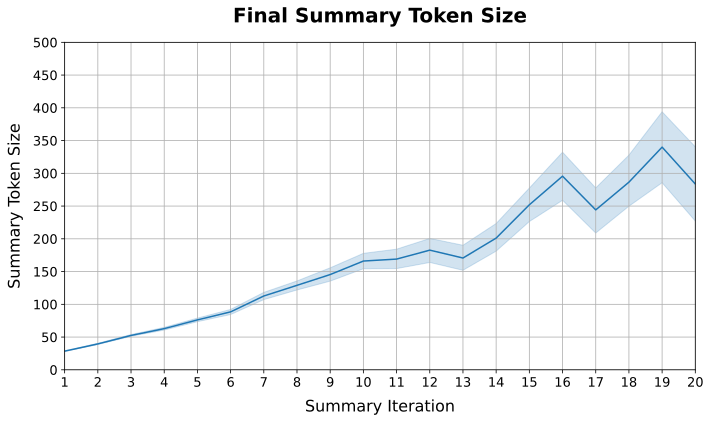

In [38]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(
    data=last_summary_df,
    x='summary_counter',
    y='output_tokens',
    estimator='mean',
    errorbar=('ci', 95)
)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(50))
plt.xlim(1, 20)
plt.ylim(0, 500)

title = 'Final Summary Token Size'

plt.title(title, fontsize = 20, pad = 20, weight = 600)
plt.xlabel('Summary Iteration', fontsize = 16, labelpad=10)
plt.ylabel('Summary Token Size', fontsize = 16, labelpad = 10)
plt.tick_params(axis='both', labelsize = 13)
plt.grid(True)
plt.tight_layout()
plt.savefig(f"{title}-linechart.pdf")
plt.show()
